<a href="https://colab.research.google.com/github/rafaelahitomi/IA_GS2/blob/main/GS2_Electric_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib
import cv2

In [ ]:
# Carregamento do dataset
ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
# Análise Exploratória de Dados (EDA)
print("Resumo das informações do dataset:")
print(ev_data.info()) # Justificativa: Identificar os tipos de dados e a presença de valores nulos

Resumo das informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         74066 non-null  object 
 1   County                                             74066 non-null  object 
 2   City                                               74065 non-null  object 
 3   State                                              74065 non-null  object 
 4   Postal Code                                        74065 non-null  float64
 5   Model Year                                         74065 non-null  float64
 6   Make                                               74065 non-null  object 
 7   Model                                              74065 non-null  object 
 8   Electric Vehicle Type                              

In [ ]:
print("\nResumo estatístico:")
print(ev_data.describe())  # Justificativa: Obter insights numéricos como médias, desvios e outliers


Resumo estatístico:
        Postal Code    Model Year  Electric Range      Base MSRP  \
count  74065.000000  74065.000000    74065.000000   74065.000000   
mean   98179.066590   2020.588942       59.218497    1077.082225   
std      214.318744      2.942430       92.111572    8736.148110   
min    89521.000000   1998.000000        0.000000       0.000000   
25%    98038.000000   2019.000000        0.000000       0.000000   
50%    98109.000000   2022.000000        0.000000       0.000000   
75%    98188.000000   2023.000000       82.000000       0.000000   
max    99403.000000   2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count          74064.000000    7.406500e+04       7.406500e+04  
mean              31.990630    2.208091e+08       5.303367e+10  
std               14.306753    7.640561e+07       7.811459e+07  
min                1.000000    4.777000e+03       3.203100e+10  
25%               21.000000    1.825952e+

In [ ]:
# Verificando valores nulos
print("\nValores nulos por coluna:")
print(ev_data.isnull().sum())  # Comentário: Verificar se é necessário tratamento adicional para valores ausentes


Valores nulos por coluna:
VIN (1-10)                                           0
County                                               0
City                                                 1
State                                                1
Postal Code                                          1
Model Year                                           1
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 2
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64


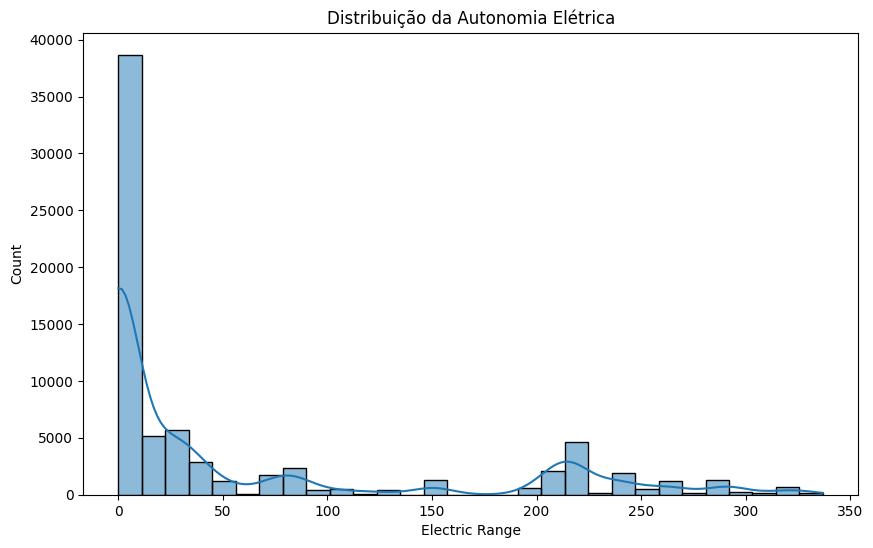

In [ ]:
# Gráficos de distribuição
plt.figure(figsize=(10, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True)
plt.title('Distribuição da Autonomia Elétrica')
plt.show()
# Justificativa: Entender a distribuição da variável alvo para insights sobre a variabilidade nos dados

In [ ]:
# Preparação dos dados
# Selecionando as colunas relevantes para a previsão
columns = ['Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP', 'Legislative District']
ev_data = ev_data[columns].dropna()
# Comentário: Optamos por remover linhas com valores nulos para simplificar a modelagem inicial; isso pode ser refinado no futuro

In [ ]:
# Codificação de variáveis categóricas
le = LabelEncoder()
ev_data['Make'] = le.fit_transform(ev_data['Make'])  # Justificativa: Transformar marcas em valores numéricos
ev_data['Electric Vehicle Type'] = le.fit_transform(ev_data['Electric Vehicle Type'])  # Justificativa: Facilitar o uso em algoritmos de ML

In [ ]:
# Separação entre variáveis independentes (X) e dependentes (y)
X = ev_data.drop('Electric Range', axis=1)  # Comentário: 'Electric Range' é a variável alvo para previsão
y = ev_data['Electric Range']

In [ ]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Justificativa: Usamos 20% dos dados para teste para garantir uma avaliação robusta do modelo

In [ ]:
# Modelagem com Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Justificativa: Random Forest foi escolhido por sua robustez e capacidade de capturar não linearidades nos dados

RandomForestRegressor(random_state=42)

In [ ]:
# Previsões e avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")  # Comentário: MSE indica o erro médio quadrático, útil para avaliar a precisão do modelo
print(f"R2 Score: {r2}")  # Comentário: R2 Score mostra a proporção da variabilidade explicada pelo modelo

Mean Squared Error: 94.75051050010067
R2 Score: 0.9890143400208491


In [ ]:
# Salvando o modelo treinado
joblib.dump(model, 'ev_charging_model.pkl')
# Justificativa: O modelo é salvo para uso posterior, o que é importante para deploy ou análises futuras

['ev_charging_model.pkl']

In [ ]:
# Integração com Visão Computacional
# Carregar uma imagem de uma estação de carregamento
def analyze_charging_station(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    # Comentário: Usamos a detecção de bordas para destacar características importantes da imagem

    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap='gray')
    plt.title('Detecção de Bordas na Estação de Carregamento')
    plt.show()
    # Justificativa: Visualizar bordas pode ser útil para análise ou processamento adicional da imagem

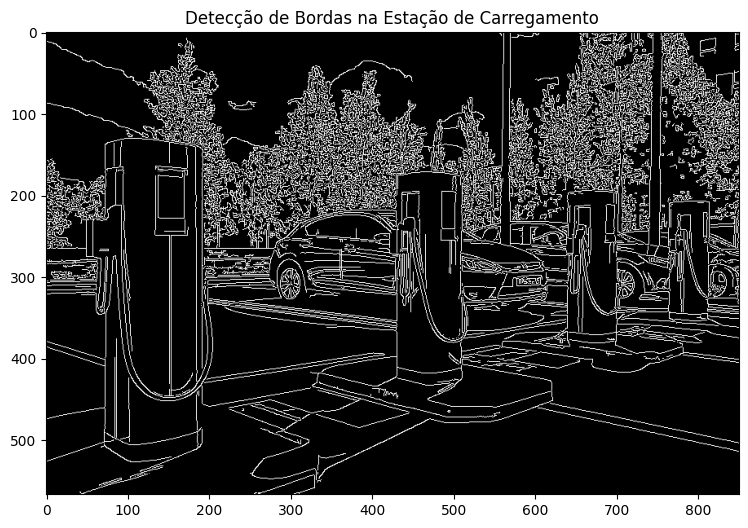

In [ ]:
# Uso da função para análise
analyze_charging_station('/content/carros.jpg')
# Comentário: Exemplo de como a função pode ser usada para analisar uma imagem específica

In [ ]:
# Conclusões e próximos passos
print("\nO modelo de Machine Learning foi treinado e avaliado. A integração com Visão Computacional também foi implementada.")
# Conclusão: O modelo de ML oferece uma base sólida para previsões de autonomia, e a integração de visão computacional pode ser expandida para aplicações mais complexas


O modelo de Machine Learning foi treinado e avaliado. A integração com Visão Computacional também foi implementada.
